# PROJECT ON SUCCESS PROBABILITY

### **ABCHiring**

**Company Introduction**
Your client for this project is ABCHiring.
	• The organization offers a hiring assessment platform across various platforms as a cloud service.
	• Their clients are organizations established in multiple sectors.
	• Their product involves an automated assessment program that is used by these organizations.
	• The SaaS organization finds a lot of clients through marketing their products over social media websites, blogs, and news articles.
	• As a result, they spend a chunk of their revenue on various marketing initiatives - digital marketing, media outreach, search engine optimization, and more.

**Current Scenario**
	• The company is targeting a highly qualified set of customers to buy your product, the organization reaps multiple benefits, such as enhanced revenue generation, higher deal closure rates, and an increase in profit margins.


**The current process suffers from the following problems:**
	• One issue is that the company has been facing the challenge of reducing its yearly marketing spends.
	• The company wants to figure out, if there’s a way to target a highly qualified set of customers to buy your product, the organization reaps multiple benefits, such as enhanced revenue generation, higher deal closure rates, and an increase in profit margins.

The marketing department has hired you as a data science consultant. They want to supplement their campaigns with a more proactive approach.
Your Role
	• You are given datasets of marketing waste and their probability percentage.
	• Your task is to build a regression model using the datasets.
	• Because there was no machine learning model for this problem in the company, you don’t have a quantifiable win condition. You need to build the best possible model.

**Project Deliverables**
	• Deliverable: Predict the probability percentage of a marketing lead.
	• Machine Learning Task: Regression
	• Target Variable: Success_probability
	• Win Condition: N/A (best possible model)

**Evaluation Metric**
	• The model evaluation will be based on the RMSE score.
    • To learn about RMSE score Python implementation

# Evaluation Metric
**The model evaluation will be based on the RMSE**

### Importing various libraries

In [48]:
!pip install -q datascience
!pip install -q pandas-profiling

In [49]:
!pip install -q --upgrade pandas-profiling

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## DATA ACQUISITION
**We are extracting the dataset to perform various steps in EDA**


|  Column Name| Description  |
|--|--|
| Deal_title   | Represents a unique title for each deal|
| Lead_name| Represents the name of a lead |
| Industry  | Represents the industry that a lead belongs to|
| Deal_value| Represents the value of a deal between a lead and your company (in Dollars) |
|Weighted_amount   | Represents a value that is estimated revenue times a probability |
| Date_of_creation  | Represents the date when a deal's pipeline was created |
| Pitch  | Represents the different types of products that your company offers to a lead|
| Contact_no  | Represents the contact details of a lead (masked) |
| Lead_revenue  | Represents the lead company's revenue (in Dollars)|
| Fund_category  | Represents the type of funding that a lead possesses |
| Geography  | Represents the geographical location of a lead (country) |
| Location  | Represents the geographical location of a lead (state or city) |
| POC_name   | Represents the lead's point of contact's name|
| Designation   | Represents the lead POC's designation |
| Lead_POC_email  | Represents the lead POC's email address |
| Hiring_candidate_role  | Represents the job role that a lead wants to hire |
| Lead_source  | Represents the source from which the lead is generated |
| Level_of_meeting | Represents the level of a meeting with the lead|
| Last_lead_update   | Represents the communication update between a lead and your company |
| Internal_POC| Represents the name of the employee who has generated the lead |
| Resource  | Represents whether your company has enough resources to satisfy a lead's requirements |
| Internal_rating  | Represents a rating (1-5) given to a lead |
| Success_probability| Represents the probability that a lead will buy a product or onboard|


In [51]:
data = pd.read_csv('C:/Users/abhay/Downloads/Project-9-Regression-Reduce-Marketing-Waste/train_data.csv')
data.head(5)

,Deal_title,Lead_name,Industry,Deal_value,Weighted_amount,Date_of_creation,Pitch,Contact_no,Lead_revenue,Fund_category,...,Designation,Lead_POC_email,Hiring_candidate_role,Lead_source,Level_of_meeting,Last_lead_update,Internal_POC,Resource,Internal_rating,Success_probability
0,Title65FB0,Montoya-Gonzalez PLC,Education/Training,325362$,1756954.8$,30-03-2020,Product_2,+1-158-537-2939x2838,500 Million - 1 Billion,Category 2,...,CEO/President,jenniferedwards@montoyagonzalez.com,"Librarian, public",Others,Level 1,?,"Jones,Eyvette W",No,1,58.6
1,Title91761,Weeks-Huffman Ltd,Real Estate,492285$,2904481.5$,16-11-2020,Product_1,629.180.6035x093,500 Million - 1 Billion,Category 1,...,CEO,jessicamontgomery@weekshuffman.com,"Production assistant, television",Others,Level 1,NaN,"Smith,Keenan H",We have all the requirements,1,60.1
2,Title12K22,"Richard, Moore and Moore and Sons",Sales/Marketing Services,304513$,1735724.1$,21-08-2020,Product_2,408.912.4032x25925,50 - 100 Million,Category 2,...,CEO,michelecoleman@richard.com,Insurance underwriter,Website,Level 1,5 days back,"Hameier,Kurt E",We have all the requirements,2,66.0
3,TitleRFVSJ,Patrick-Moreno Inc,Security Services,NaN,532115.65$,02-01-2020,Product_2,-11006,500 Million - 1 Billion,Category 3,...,Executive Vice President,brianturner@patrickmoreno.com,"Biochemist, clinical",Website,Level 1,?,"Gould,Lisa D",We have all the requirements,3,62.6
4,Title3PYNF,West LLC and Sons,Materials/Manufacturing,183462$,1256714.7$,24-05-2019,Product_2,+1-631-535-9343x88671,500 Million - 1 Billion,Category 4,...,Vice President / GM (04-present) : VP Sales an...,candicesheppard@west.com,Data processing manager,Others,Level 3,Up-to-date,"Davis,Sharrice A",Deliverable,4,71.2


## Data Information
**Total there are 5605 rows and 23 columns**

**Out of 23 columns/features 2 are Numerical and rest are Categorical**

**We need to check if there are any missing values in the dataset, if then then proabably we want to replace it with Mean/Median/Mode**

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5605 entries, 0 to 5604
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Deal_title             5605 non-null   object 
 1   Lead_name              5605 non-null   object 
 2   Industry               5604 non-null   object 
 3   Deal_value             5565 non-null   object 
 4   Weighted_amount        5182 non-null   object 
 5   Date_of_creation       5605 non-null   object 
 6   Pitch                  5605 non-null   object 
 7   Contact_no             5605 non-null   object 
 8   Lead_revenue           5605 non-null   object 
 9   Fund_category          5605 non-null   object 
 10  Geography              4815 non-null   object 
 11  Location               5596 non-null   object 
 12  POC_name               5599 non-null   object 
 13  Designation            5605 non-null   object 
 14  Lead_POC_email         5605 non-null   object 
 15  Hiri

# Data Description

- **To get some quick description on the data you can use Describe defined in the Pandas Library
- **Gives 5 point summary i.e. "Count, Mean, Min/Max, Standard Deviation, Percentile"

In [53]:
data.describe()

,Internal_rating,Success_probability
count,5605.000000,5605.000000
mean,3.014630,64.743536
std,1.413885,17.919659
min,1.000000,-5.000000
25%,2.000000,60.500000
50%,3.000000,65.200000
75%,4.000000,69.600000
max,5.000000,107.340000


## Data Mining

- Checking if there are any missing values in the data

In [54]:
data.isnull().sum()

Deal_title                 0
Lead_name                  0
Industry                   1
Deal_value                40
Weighted_amount          423
Date_of_creation           0
Pitch                      0
Contact_no                 0
Lead_revenue               0
Fund_category              0
Geography                790
Location                   9
POC_name                   6
Designation                0
Lead_POC_email             0
Hiring_candidate_role      0
Lead_source                0
Level_of_meeting           0
Last_lead_update         498
Internal_POC               0
Resource                 111
Internal_rating            0
Success_probability        0
dtype: int64

In [55]:
round(100*(data.isnull().sum()/len(data.index)), 2)

Deal_title                0.00
Lead_name                 0.00
Industry                  0.02
Deal_value                0.71
Weighted_amount           7.55
Date_of_creation          0.00
Pitch                     0.00
Contact_no                0.00
Lead_revenue              0.00
Fund_category             0.00
Geography                14.09
Location                  0.16
POC_name                  0.11
Designation               0.00
Lead_POC_email            0.00
Hiring_candidate_role     0.00
Lead_source               0.00
Level_of_meeting          0.00
Last_lead_update          8.88
Internal_POC              0.00
Resource                  1.98
Internal_rating           0.00
Success_probability       0.00
dtype: float64

In [9]:
data['Geography'].value_counts()

USA      2424
India    2391
Name: Geography, dtype: int64

In [56]:
data['Location'].value_counts()

Aurangabad                                  28
Aligarh                                     22
Muzaffarpur                                 21
Saidapur                                    21
Chandigarh                                  21
                                            ..
Hartford-West Hartford-East Hartford, CT     2
Decatur, IL                                  2
Bowling Green, KY                            2
Rapid City, SD                               1
Cheyenne, WY                                 1
Name: Location, Length: 597, dtype: int64

# Data PreProfiling

In [11]:
from pandas_profiling import ProfileReport
design_report = ProfileReport(data)
design_report

<AxesSubplot:ylabel='Success_probability'>

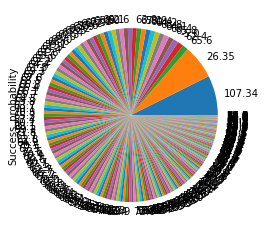

In [155]:
import matplotlib.pyplot as plt
%matplotlib inline
data.groupby(['Success_probability'])['Success_probability'].count().sort_values(ascending=False).plot(kind = 'pie')

## Replacing Missing Values with Mode

In [61]:
data['Deal_value'].mode()[0]

'121985$'

In [62]:
data['Deal_value'] = data['Deal_value'].fillna(data['Deal_value'].mode()[0])

In [63]:
data['Deal_value'].value_counts()

121985$    42
274812$     2
176177$     2
170335$     2
148609$     2
           ..
128984$     1
293930$     1
369547$     1
407444$     1
208360$     1
Name: Deal_value, Length: 5536, dtype: int64

In [64]:
data.isnull().sum()

Deal_title                 0
Lead_name                  0
Industry                   1
Deal_value                 0
Weighted_amount          423
Date_of_creation           0
Pitch                      0
Contact_no                 0
Lead_revenue               0
Fund_category              0
Geography                790
Location                   9
POC_name                   6
Designation                0
Lead_POC_email             0
Hiring_candidate_role      0
Lead_source                0
Level_of_meeting           0
Last_lead_update         498
Internal_POC               0
Resource                 111
Internal_rating            0
Success_probability        0
dtype: int64

In [65]:
data['Industry'].mode()[0]

'Banks'

In [66]:
data['Industry'] = data['Industry'].fillna(data['Industry'].mode()[0])

In [67]:
data['Location'].mode()[0]

'Aurangabad'

In [70]:
data['Location'] = data['Location'].fillna(data['Location'].mode()[0])

In [71]:
data['Geography'].mode()[0]

'USA'

In [72]:
data['Geography'] = data['Geography'].fillna(data['Geography'].mode()[0])

In [74]:
data['Resource'].mode()[0]

'No'

In [75]:
data['Resource'] = data['Resource'].fillna(data['Resource'].mode()[0])

In [76]:
data['Last_lead_update'].mode()[0]

'Up-to-date'

In [77]:
data['Last_lead_update'] = data['Last_lead_update'].fillna(data['Last_lead_update'].mode()[0])

In [79]:
data['POC_name'].mode()[0]

'pooja'

In [80]:
data['POC_name'] = data['POC_name'].fillna(data['POC_name'].mode()[0])

In [17]:
#data['Industry'] = data['Industry'].fillna(data['Industry'].mode()[0])
#data['Location'] = data['Location'].fillna(data['Location'].mode()[0])
#data['Geography'] = data['Geography'].fillna(data['Geography'].mode()[0])
#data['Resource'] = data['Resource'].fillna(data['Resource'].mode()[0])
#data['Last_lead_update'] = data['Last_lead_update'].fillna(data['Last_lead_update'].mode()[0])
#data['POC_name'] = data['POC_name'].fillna(data['POC_name'].mode()[0])

In [81]:
data.isnull().sum()

Deal_title                 0
Lead_name                  0
Industry                   0
Deal_value                 0
Weighted_amount          423
Date_of_creation           0
Pitch                      0
Contact_no                 0
Lead_revenue               0
Fund_category              0
Geography                  0
Location                   0
POC_name                   0
Designation                0
Lead_POC_email             0
Hiring_candidate_role      0
Lead_source                0
Level_of_meeting           0
Last_lead_update           0
Internal_POC               0
Resource                   0
Internal_rating            0
Success_probability        0
dtype: int64

In [82]:
data['Weighted_amount'].mode()[0]

'1000253.1$'

In [83]:
data['Weighted_amount'] = data['Weighted_amount'].fillna(data['Weighted_amount'].mode()[0])

### After replacing with Mode, evaluating our data

In [84]:
data.isnull().sum()

Deal_title               0
Lead_name                0
Industry                 0
Deal_value               0
Weighted_amount          0
Date_of_creation         0
Pitch                    0
Contact_no               0
Lead_revenue             0
Fund_category            0
Geography                0
Location                 0
POC_name                 0
Designation              0
Lead_POC_email           0
Hiring_candidate_role    0
Lead_source              0
Level_of_meeting         0
Last_lead_update         0
Internal_POC             0
Resource                 0
Internal_rating          0
Success_probability      0
dtype: int64

# Data PostProfiling

In [85]:
from pandas_profiling import ProfileReport
design_report = ProfileReport(data)
design_report

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5605 entries, 0 to 5604
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Deal_title             5605 non-null   object 
 1   Lead_name              5605 non-null   object 
 2   Industry               5605 non-null   object 
 3   Deal_value             5605 non-null   object 
 4   Weighted_amount        5605 non-null   object 
 5   Date_of_creation       5605 non-null   object 
 6   Pitch                  5605 non-null   object 
 7   Contact_no             5605 non-null   object 
 8   Lead_revenue           5605 non-null   object 
 9   Fund_category          5605 non-null   object 
 10  Geography              5605 non-null   object 
 11  Location               5605 non-null   object 
 12  POC_name               5605 non-null   object 
 13  Designation            5605 non-null   object 
 14  Lead_POC_email         5605 non-null   object 
 15  Hiri

## Seperating the Categorical and Numerical Columns

In [87]:
X = data.drop(['Success_probability'], axis=1)
y = data['Success_probability']

In [88]:
X.columns

Index(['Deal_title', 'Lead_name', 'Industry', 'Deal_value', 'Weighted_amount',
       'Date_of_creation', 'Pitch', 'Contact_no', 'Lead_revenue',
       'Fund_category', 'Geography', 'Location', 'POC_name', 'Designation',
       'Lead_POC_email', 'Hiring_candidate_role', 'Lead_source',
       'Level_of_meeting', 'Last_lead_update', 'Internal_POC', 'Resource',
       'Internal_rating'],
      dtype='object')

In [89]:
data_test_cat = X[['Deal_title', 'Lead_name', 'Industry', 'Deal_value', 'Weighted_amount',
       'Date_of_creation', 'Pitch', 'Contact_no', 'Lead_revenue',
       'Fund_category', 'Geography', 'Location', 'POC_name', 'Designation',
       'Lead_POC_email', 'Hiring_candidate_role', 'Lead_source',
       'Level_of_meeting', 'Last_lead_update', 'Internal_POC', 'Resource']]

In [90]:
data_test_cat

,Deal_title,Lead_name,Industry,Deal_value,Weighted_amount,Date_of_creation,Pitch,Contact_no,Lead_revenue,Fund_category,...,Location,POC_name,Designation,Lead_POC_email,Hiring_candidate_role,Lead_source,Level_of_meeting,Last_lead_update,Internal_POC,Resource
0,Title65FB0,Montoya-Gonzalez PLC,Education/Training,325362$,1756954.8$,30-03-2020,Product_2,+1-158-537-2939x2838,500 Million - 1 Billion,Category 2,...,Chikka Mandya,nirma,CEO/President,jenniferedwards@montoyagonzalez.com,"Librarian, public",Others,Level 1,?,"Jones,Eyvette W",No
1,Title91761,Weeks-Huffman Ltd,Real Estate,492285$,2904481.5$,16-11-2020,Product_1,629.180.6035x093,500 Million - 1 Billion,Category 1,...,Bhilai,ritu,CEO,jessicamontgomery@weekshuffman.com,"Production assistant, television",Others,Level 1,Up-to-date,"Smith,Keenan H",We have all the requirements
2,Title12K22,"Richard, Moore and Moore and Sons",Sales/Marketing Services,304513$,1735724.1$,21-08-2020,Product_2,408.912.4032x25925,50 - 100 Million,Category 2,...,"Riverside-San Bernardino-Ontario, CA",Michele Coleman,CEO,michelecoleman@richard.com,Insurance underwriter,Website,Level 1,5 days back,"Hameier,Kurt E",We have all the requirements
3,TitleRFVSJ,Patrick-Moreno Inc,Security Services,121985$,532115.65$,02-01-2020,Product_2,-11006,500 Million - 1 Billion,Category 3,...,Bengaluru,rani,Executive Vice President,brianturner@patrickmoreno.com,"Biochemist, clinical",Website,Level 1,?,"Gould,Lisa D",We have all the requirements
4,Title3PYNF,West LLC and Sons,Materials/Manufacturing,183462$,1256714.7$,24-05-2019,Product_2,+1-631-535-9343x88671,500 Million - 1 Billion,Category 4,...,"Watertown-Fort Drum, NY",Candice Sheppard,Vice President / GM (04-present) : VP Sales an...,candicesheppard@west.com,Data processing manager,Others,Level 3,Up-to-date,"Davis,Sharrice A",Deliverable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5600,TitleOZDHH,Burton-Prince and Sons,Insurance,271258$,1722488.3$,31-12-2020,Product_2,854.226.2565x444,100 - 500 Million,Category 3,...,"Cleveland, TN",Daniel Cisneros,Chairman/Chief Innovation Officer,danielcisneros@burtonprince.com,Broadcast engineer,Contact Email,Level 3,more than a month,"Brown,Maxine A",Not enough
5601,TitleLQ3LN,"Avila, Crane and Gross Inc",Non-Profit,255913$,1394725.85$,10-02-2021,Product_1,(521)706-0759,50 - 100 Million,Category 3,...,Hindupur,noor bano,CEO,heatherparks@avila.com,Outdoor activities/education manager,Contact Email,Level 1,5 days back,"Pappas,Mark S",No
5602,TitleW7GG8,Norton-Mccarthy Ltd,Banks,119316$,674135.4$,22-06-2020,Product_2,904-871-9413x22810,50 - 100 Million,Category 4,...,Bengaluru,renu,CEO/Chairman/President,ericjones@nortonmccarthy.com,Chiropractor,Others,Level 1,5 days back,"Thomas,Lori E",Cannot deliver
5603,TitleIY66P,"Meadows, Murphy and Rowland Inc",Information Services,346955$,2116425.5$,13-06-2020,Product_1,285.082.4348x533,500 Million - 1 Billion,Category 3,...,Cuttack,priyanka,CEO/Co-Founder/Chairman,jessicalong@meadows.com,Associate Professor,Contact Email,Level 2,More than 2 weeks,"Jones,Eyvette W",Deliverable


In [91]:
data_test_int = X.drop(['Deal_title', 'Lead_name', 'Industry', 'Deal_value', 'Weighted_amount',
       'Date_of_creation', 'Pitch', 'Contact_no', 'Lead_revenue',
       'Fund_category', 'Geography', 'Location', 'POC_name', 'Designation',
       'Lead_POC_email', 'Hiring_candidate_role', 'Lead_source',
       'Level_of_meeting', 'Last_lead_update', 'Internal_POC', 'Resource'], axis=1)

In [92]:
data_test_int

,Internal_rating
0,1
1,1
2,2
3,3
4,4
...,...
5600,2
5601,2
5602,1
5603,4


In [93]:
from sklearn.preprocessing import LabelEncoder
data_test_cat = data_test_cat.apply(LabelEncoder().fit_transform)

In [94]:
data_test_cat

,Deal_title,Lead_name,Industry,Deal_value,Weighted_amount,Date_of_creation,Pitch,Contact_no,Lead_revenue,Fund_category,...,Location,POC_name,Designation,Lead_POC_email,Hiring_candidate_role,Lead_source,Level_of_meeting,Last_lead_update,Internal_POC,Resource
0,952,3419,36,2742,1398,741,1,1287,2,1,...,123,3513,3,2396,347,2,0,2,30,2
1,1388,5296,111,4811,3453,412,0,4611,2,0,...,66,3755,0,2529,459,2,0,9,51,4
2,168,4132,118,2499,1358,530,1,3993,1,1,...,463,1968,0,3960,322,3,0,1,23,4
3,4213,3792,124,282,4296,27,1,1884,2,2,...,60,3694,7,722,62,3,0,2,20,4
4,583,5314,72,1011,447,598,1,1616,2,3,...,580,392,9,805,150,2,2,9,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5600,3849,620,60,2098,1333,774,1,5196,0,2,...,127,654,5,1273,68,0,2,10,5,3
5601,3372,181,83,1912,703,239,0,602,1,2,...,240,3530,0,2031,418,0,0,1,44,2
5602,5007,3637,17,240,4557,551,1,5318,1,3,...,60,3737,1,1799,103,2,0,1,53,0
5603,2907,3243,59,2988,2046,325,0,3657,2,2,...,143,3616,2,2526,53,0,1,5,30,1


# Merging the Categorical and Numerical data

In [95]:
data_test_final = pd.concat([data_test_cat,data_test_int],axis=1)

In [96]:
data_test_final

,Deal_title,Lead_name,Industry,Deal_value,Weighted_amount,Date_of_creation,Pitch,Contact_no,Lead_revenue,Fund_category,...,POC_name,Designation,Lead_POC_email,Hiring_candidate_role,Lead_source,Level_of_meeting,Last_lead_update,Internal_POC,Resource,Internal_rating
0,952,3419,36,2742,1398,741,1,1287,2,1,...,3513,3,2396,347,2,0,2,30,2,1
1,1388,5296,111,4811,3453,412,0,4611,2,0,...,3755,0,2529,459,2,0,9,51,4,1
2,168,4132,118,2499,1358,530,1,3993,1,1,...,1968,0,3960,322,3,0,1,23,4,2
3,4213,3792,124,282,4296,27,1,1884,2,2,...,3694,7,722,62,3,0,2,20,4,3
4,583,5314,72,1011,447,598,1,1616,2,3,...,392,9,805,150,2,2,9,12,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5600,3849,620,60,2098,1333,774,1,5196,0,2,...,654,5,1273,68,0,2,10,5,3,2
5601,3372,181,83,1912,703,239,0,602,1,2,...,3530,0,2031,418,0,0,1,44,2,2
5602,5007,3637,17,240,4557,551,1,5318,1,3,...,3737,1,1799,103,2,0,1,53,0,1
5603,2907,3243,59,2988,2046,325,0,3657,2,2,...,3616,2,2526,53,0,1,5,30,1,4


In [97]:
x = data_test_final

In [98]:
x

,Deal_title,Lead_name,Industry,Deal_value,Weighted_amount,Date_of_creation,Pitch,Contact_no,Lead_revenue,Fund_category,...,POC_name,Designation,Lead_POC_email,Hiring_candidate_role,Lead_source,Level_of_meeting,Last_lead_update,Internal_POC,Resource,Internal_rating
0,952,3419,36,2742,1398,741,1,1287,2,1,...,3513,3,2396,347,2,0,2,30,2,1
1,1388,5296,111,4811,3453,412,0,4611,2,0,...,3755,0,2529,459,2,0,9,51,4,1
2,168,4132,118,2499,1358,530,1,3993,1,1,...,1968,0,3960,322,3,0,1,23,4,2
3,4213,3792,124,282,4296,27,1,1884,2,2,...,3694,7,722,62,3,0,2,20,4,3
4,583,5314,72,1011,447,598,1,1616,2,3,...,392,9,805,150,2,2,9,12,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5600,3849,620,60,2098,1333,774,1,5196,0,2,...,654,5,1273,68,0,2,10,5,3,2
5601,3372,181,83,1912,703,239,0,602,1,2,...,3530,0,2031,418,0,0,1,44,2,2
5602,5007,3637,17,240,4557,551,1,5318,1,3,...,3737,1,1799,103,2,0,1,53,0,1
5603,2907,3243,59,2988,2046,325,0,3657,2,2,...,3616,2,2526,53,0,1,5,30,1,4


# Spliting the data into x & y, Features and Target variables respectively

In [99]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)

In [101]:
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

x_train: (4484, 22)
y_train: (4484,)
x_test: (1121, 22)
y_test: (1121,)


In [104]:
y.describe()

count    5605.000000
mean       64.743536
std        17.919659
min        -5.000000
25%        60.500000
50%        65.200000
75%        69.600000
max       107.340000
Name: Success_probability, dtype: float64

In [105]:
df_y = pd.DataFrame(y)

In [106]:
df_y 

,Success_probability
0,58.60
1,60.10
2,66.00
3,62.60
4,71.20
...,...
5600,65.80
5601,53.90
5602,107.34
5603,60.70


In [109]:
df_y = df_y.astype({'Success_probability':'int'})

In [110]:
df_y

,Success_probability
0,58
1,60
2,66
3,62
4,71
...,...
5600,65
5601,53
5602,107
5603,60


In [111]:
y = df_y

In [112]:
y

,Success_probability
0,58
1,60
2,66
3,62
4,71
...,...
5600,65
5601,53
5602,107
5603,60


In [113]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)

In [114]:
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

x_train: (4484, 22)
y_train: (4484, 1)
x_test: (1121, 22)
y_test: (1121, 1)


In [119]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report
lr = LogisticRegression()
lr.fit(x_train,y_train)
print("Training Accuracy")
print(lr.score(x_train,y_train))
print("Testing Accuracy")
print(lr.score(x_test,y_test))

Training Accuracy
0.10548617305976807
Testing Accuracy
0.08831400535236396


In [125]:
predicted = lr.predict(x_test)
print(confusion_matrix(y_test,predicted))
print(classification_report(y_test,predicted))

#scoresdt = cross_val_score(lr,x_train,y_train,cv=10,scoring='recall')
#print(scoresdt)
#print("Average Recall")
#print(np.mean(scoresdt))

[[0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [0 0 5 ... 0 0 2]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 5 ... 0 0 7]]
              precision    recall  f1-score   support

          -5       0.00      0.00      0.00         9
           8       0.00      0.00      0.00         7
          26       0.09      0.06      0.07        78
          51       0.00      0.00      0.00         2
          52       0.00      0.00      0.00         2
          53       0.00      0.00      0.00         5
          54       0.00      0.00      0.00         8
          55       0.00      0.00      0.00        15
          56       0.00      0.00      0.00        12
          57       0.20      0.03      0.04        40
          58       0.02      0.03      0.03        36
          59       0.09      0.08      0.08        39
          60       0.09      0.18      0.12        49
          61       0.07      0.05      0.05        43
          62       0.12      0.33      0.18        70
          63   

In [126]:
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)

In [127]:
y_pred_train

array([ 65, 107,  61, ...,  58,  68,  69])

In [128]:
y_pred_test

array([60, 60, 67, ..., 65, 68, 62])

In [129]:
from sklearn import metrics
RMSE_train = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

In [130]:
print('RMSE for training set:',RMSE_train.round(2))
print('RMSE for test set:', RMSE_test.round(2))

MSE for training set: 22.19
MSE for test set: 22.76


# Importing Test Data

In [131]:
data_test = pd.read_csv('C:/Users/abhay/Downloads/Project-9-Regression-Reduce-Marketing-Waste/test_data.csv')
print('Data Shape:', data_test.shape)
data_test.head(10)

Data Shape: (1402, 22)


,Deal_title,Lead_name,Industry,Deal_value,Weighted_amount,Date_of_creation,Pitch,Contact_no,Lead_revenue,Fund_category,...,POC_name,Designation,Lead_POC_email,Hiring_candidate_role,Lead_source,Level_of_meeting,Last_lead_update,Internal_POC,Resource,Internal_rating
0,TitleLFW99,Mcgrath PLC PLC,Banks,148175$,963137.5$,2019-11-11,Product_1,(255)484-8544x98190,500 Million - 1 Billion,Category 4,...,rashmi @ rinku,Chief Executive Officer,michaelortega@mcgrath.com,Exhibition designer,Contact Email,Level 2,More than 2 weeks,"Houston,Arnold E",Deliverable,3
1,Title7WR77,Shepard Inc LLC,Automotive/Transportation,273302$,1803793.2$,2019-06-15,Product_1,001-537-692-7359x0941,50 - 100 Million,Category 1,...,jyoti,Chairman/Chief Innovation Officer,bradleypatton@shepard.com,"Designer, furniture",Marketing Event,Level 3,Did not hear back after Level 1,"Mabrey,Kevin C",Cannot deliver,1
2,TitleF6Q9B,"Gomez, Keith and Simpson Ltd",Insurance,185344$,1260339.2$,2020-03-24,Product_2,001-832-090-1215,50 - 100 Million,Category 1,...,anita,CEO/Co-Founder/Chairman,meredithjones@gomez.com,Fisheries officer,Marketing Event,Level 3,?,"Dunaway,Antoine",Cannot deliver,3
3,Title8TVFW,"Mendoza, Hess and Martin Ltd",Financial Services,189599$,1194473.7$,2020-02-01,Product_1,(887)737-2139,500 Million - 1 Billion,Category 1,...,Terri Freeman,Vice President / GM (04-present) : VP Sales an...,terrifreeman@mendoza.com,Travel agency manager,Others,Level 1,NaN,"Shelton,Sidney P",Not enough,3
4,TitleH8JO8,"Cunningham, Daniels and Brady LLC",Software,379241$,2427142.4$,2020-10-20,Product_1,+1-424-763-3037x699,50 - 100 Million,Category 1,...,maya,Executive Vice President,kevinwalton@cunningham.com,Arts development officer,Contact Email,Level 3,Following up but lead not responding,"Young,Valerie K",Yes,1
5,TitleTIQQB,Novak-Summers Inc,Banks,97952$,592609.6$,2019-03-07,Product_2,6936839448,50 - 100 Million,Category 3,...,smt dhapa devi,Chairman/Chief Innovation Officer,tiffanymurphy@novaksummers.com,Recruitment consultant,Marketing Event,Level 1,Following up but lead not responding,"Featherstone,Adrian R",We have all the requirements,5
6,TitleMX686,Miller-Tucker PLC,Insurance,11867$,71795.35$,2019-06-24,Product_1,001-219-290-3960x396,50 - 100 Million,Category 4,...,anuradha,CEO,michelewilliams@millertucker.com,Solicitor,Marketing Event,Level 1,Pending,"Young,Valerie K",We have all the requirements,3
7,TitleIJHNQ,"Henson, Garrett and Wood LLC",REIT,68740$,419314.0$,2021-02-14,Product_2,001-996-554-8524x495,100 - 500 Million,Category 1,...,Susan Robertson,Vice President / GM (04-present) : VP Sales an...,susanrobertson@henson.com,"Optician, dispensing",Others,Level 2,5 days back,"Young,Valerie K",Deliverable,2
8,Title0I2YB,Reyes-Collins Group,Railroads,466918$,2964929.3$,2019-08-09,Product_2,357-602-0686x3211,100 - 500 Million,Category 1,...,anshika kumari,CEO/Co-Founder/Chairman,amandaware@reyescollins.com,"Engineer, materials",Others,Level 3,2 days back,"Shelton,Sidney P",Deliverable,2
9,TitleAQQ0V,Gomez Inc Group,Banks,323463$,2021643.75$,2019-05-21,Product_2,431-275-6123,100 - 500 Million,Category 2,...,Michael Reyes,Vice President / GM (04-present) : VP Sales an...,michaelreyes@gomez.com,Emergency planning/management officer,Contact Email,Level 3,NaN,"Gilley,Janine",No,2


In [132]:
data_test.columns

Index(['Deal_title', 'Lead_name', 'Industry', 'Deal_value', 'Weighted_amount',
       'Date_of_creation', 'Pitch', 'Contact_no', 'Lead_revenue',
       'Fund_category', 'Geography', 'Location', 'POC_name', 'Designation',
       'Lead_POC_email', 'Hiring_candidate_role', 'Lead_source',
       'Level_of_meeting', 'Last_lead_update', 'Internal_POC', 'Resource',
       'Internal_rating'],
      dtype='object')

In [133]:
data_test_cat1 = data_test[['Deal_title', 'Lead_name', 'Industry', 'Deal_value', 'Weighted_amount',
       'Date_of_creation', 'Pitch', 'Contact_no', 'Lead_revenue',
       'Fund_category', 'Geography', 'Location', 'POC_name', 'Designation',
       'Lead_POC_email', 'Hiring_candidate_role', 'Lead_source',
       'Level_of_meeting', 'Last_lead_update', 'Internal_POC', 'Resource']]

In [134]:
data_test_cat1

,Deal_title,Lead_name,Industry,Deal_value,Weighted_amount,Date_of_creation,Pitch,Contact_no,Lead_revenue,Fund_category,...,Location,POC_name,Designation,Lead_POC_email,Hiring_candidate_role,Lead_source,Level_of_meeting,Last_lead_update,Internal_POC,Resource
0,TitleLFW99,Mcgrath PLC PLC,Banks,148175$,963137.5$,2019-11-11,Product_1,(255)484-8544x98190,500 Million - 1 Billion,Category 4,...,Silvassa,rashmi @ rinku,Chief Executive Officer,michaelortega@mcgrath.com,Exhibition designer,Contact Email,Level 2,More than 2 weeks,"Houston,Arnold E",Deliverable
1,Title7WR77,Shepard Inc LLC,Automotive/Transportation,273302$,1803793.2$,2019-06-15,Product_1,001-537-692-7359x0941,50 - 100 Million,Category 1,...,Kalyan,jyoti,Chairman/Chief Innovation Officer,bradleypatton@shepard.com,"Designer, furniture",Marketing Event,Level 3,Did not hear back after Level 1,"Mabrey,Kevin C",Cannot deliver
2,TitleF6Q9B,"Gomez, Keith and Simpson Ltd",Insurance,185344$,1260339.2$,2020-03-24,Product_2,001-832-090-1215,50 - 100 Million,Category 1,...,Dispur,anita,CEO/Co-Founder/Chairman,meredithjones@gomez.com,Fisheries officer,Marketing Event,Level 3,?,"Dunaway,Antoine",Cannot deliver
3,Title8TVFW,"Mendoza, Hess and Martin Ltd",Financial Services,189599$,1194473.7$,2020-02-01,Product_1,(887)737-2139,500 Million - 1 Billion,Category 1,...,"Hickory-Lenoir-Morganton, NC",Terri Freeman,Vice President / GM (04-present) : VP Sales an...,terrifreeman@mendoza.com,Travel agency manager,Others,Level 1,NaN,"Shelton,Sidney P",Not enough
4,TitleH8JO8,"Cunningham, Daniels and Brady LLC",Software,379241$,2427142.4$,2020-10-20,Product_1,+1-424-763-3037x699,50 - 100 Million,Category 1,...,Jorapokhar,maya,Executive Vice President,kevinwalton@cunningham.com,Arts development officer,Contact Email,Level 3,Following up but lead not responding,"Young,Valerie K",Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1397,TitleUV6AT,"Hughes, Montgomery and Walters Ltd",Personal Services,17126$,105324.9$,2020-07-01,Product_2,148-051-4792x8097,100 - 500 Million,Category 3,...,Bengaluru,annu kashyap,Chairman/CEO/President,johngriffin@hughes.com,"Surveyor, building",Marketing Event,Level 3,More than 2 weeks,"Dunaway,Antoine",Yes
1398,TitleBDLH3,Mckenzie and Sons and Sons,Sales/Marketing Services,371988$,2641114.8$,2021-01-21,Product_1,001-864-073-6775x7722,100 - 500 Million,Category 1,...,Aurangabad,fahira soni,CEO/President,jessicawhite@mckenzie.com,Lexicographer,Website,Level 3,2 days back,"Pappas,Mark S",We have all the requirements
1399,Title1YMGO,"Long, Nichols and Parker and Sons",Professional Services,159358$,916308.5$,2021-01-21,Product_1,(863)866-6288,50 - 100 Million,Category 2,...,"Sierra Vista-Douglas, AZ",Jonathan Smith,Chairman/CEO/President,jonathansmith@long.com,"Radiographer, diagnostic",Others,Level 2,Did not hear back after Level 1,"Thomas,Lori E",Deliverable
1400,Title3NHIN,Watts-Dunlap Group,Machine Tools,192001$,1276806.65$,2020-12-25,Product_2,(354)064-8133x173,500 Million - 1 Billion,Category 4,...,Brahmapur,smt. indira bai,CEO,sherriortiz@wattsdunlap.com,"Doctor, general practice",Website,Level 2,More than 2 weeks,"Green,Candy",We have all the requirements


In [136]:
data_test_int1 = data_test.drop(['Deal_title', 'Lead_name', 'Industry', 'Deal_value', 'Weighted_amount',
       'Date_of_creation', 'Pitch', 'Contact_no', 'Lead_revenue',
       'Fund_category', 'Geography', 'Location', 'POC_name', 'Designation',
       'Lead_POC_email', 'Hiring_candidate_role', 'Lead_source',
       'Level_of_meeting', 'Last_lead_update', 'Internal_POC', 'Resource'], axis=1)

In [137]:
data_test_int1

,Internal_rating
0,3
1,1
2,3
3,3
4,1
...,...
1397,2
1398,5
1399,3
1400,4


## Using Label Enabling and Merging Categorical & Numerical Columns

In [138]:
data_test_cat1 = data_test_cat1.apply(LabelEncoder().fit_transform)

In [139]:
data_test_cat1

,Deal_title,Lead_name,Industry,Deal_value,Weighted_amount,Date_of_creation,Pitch,Contact_no,Lead_revenue,Fund_category,...,Location,POC_name,Designation,Lead_POC_email,Hiring_candidate_role,Lead_source,Level_of_meeting,Last_lead_update,Internal_POC,Resource
0,845,751,12,142,1280,260,0,70,2,3,...,456,1018,6,963,210,0,1,5,28,1
1,304,1141,10,511,361,135,0,658,1,0,...,252,842,5,149,139,1,2,3,36,0
2,595,404,52,271,129,372,1,728,1,0,...,145,739,2,946,225,1,2,2,14,0
3,342,766,38,284,95,328,0,247,2,0,...,212,662,9,1286,557,2,0,11,50,3
4,666,233,114,825,628,544,0,386,1,0,...,246,923,7,776,43,0,2,4,59,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1397,1209,558,83,226,25,459,1,867,0,2,...,53,745,4,643,503,1,2,5,14,5
1398,464,756,103,803,734,616,0,741,0,0,...,36,801,3,621,304,3,2,0,44,4
1399,86,682,89,179,1261,616,0,243,1,1,...,453,349,4,660,440,2,1,3,53,1
1400,153,1315,62,290,138,596,1,105,2,3,...,81,1141,0,1222,152,3,1,5,22,4


In [141]:
data_final1 = pd.concat([data_test_cat1,data_test_int1], axis=1)

In [142]:
data_final1

,Deal_title,Lead_name,Industry,Deal_value,Weighted_amount,Date_of_creation,Pitch,Contact_no,Lead_revenue,Fund_category,...,POC_name,Designation,Lead_POC_email,Hiring_candidate_role,Lead_source,Level_of_meeting,Last_lead_update,Internal_POC,Resource,Internal_rating
0,845,751,12,142,1280,260,0,70,2,3,...,1018,6,963,210,0,1,5,28,1,3
1,304,1141,10,511,361,135,0,658,1,0,...,842,5,149,139,1,2,3,36,0,1
2,595,404,52,271,129,372,1,728,1,0,...,739,2,946,225,1,2,2,14,0,3
3,342,766,38,284,95,328,0,247,2,0,...,662,9,1286,557,2,0,11,50,3,3
4,666,233,114,825,628,544,0,386,1,0,...,923,7,776,43,0,2,4,59,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1397,1209,558,83,226,25,459,1,867,0,2,...,745,4,643,503,1,2,5,14,5,2
1398,464,756,103,803,734,616,0,741,0,0,...,801,3,621,304,3,2,0,44,4,5
1399,86,682,89,179,1261,616,0,243,1,1,...,349,4,660,440,2,1,3,53,1,3
1400,153,1315,62,290,138,596,1,105,2,3,...,1141,0,1222,152,3,1,5,22,4,4


# Predicting Success Probability values for Test Data using Trained Model

In [143]:
data_test_pred1 = lr.predict(data_final1)

In [146]:
data_test_pred1 = pd.DataFrame(data_test_pred1)

In [147]:
data_test_pred1

,0
0,67
1,62
2,107
3,65
4,67
...,...
1397,26
1398,26
1399,71
1400,60


In [149]:
submission_file = pd.concat([data_test['Deal_title'], data_test_pred1.round(2)], axis = 1)

In [150]:
submission_file

,Deal_title,0
0,TitleLFW99,67
1,Title7WR77,62
2,TitleF6Q9B,107
3,Title8TVFW,65
4,TitleH8JO8,67
...,...,...
1397,TitleUV6AT,26
1398,TitleBDLH3,26
1399,Title1YMGO,71
1400,Title3NHIN,60


In [152]:
submission_file.to_csv('C:/Users/abhay/Downloads/Project-9-Regression-Reduce-Marketing-Waste/Submission File1.csv', header=False, index=False)